<img src="images/utfsm.png" alt="" width="100px" align="right"/>
# CCTVal_Introduction CFD

## Licencia y configuración del laboratorio
Ejecutar la siguiente celda mediante *`Ctr-S`*.

In [175]:
"""
IPython Notebook v4.0 para python 3.0
Pablo Bunout.
"""
# Configuración para recargar módulos y librerías dinámicamente
%reload_ext autoreload
%autoreload 2

# Configuración para graficos en línea
%matplotlib inline

# Configuración de estilo
from IPython.core.display import HTML
HTML(open("./style/style.css", "").read())

ValueError: empty mode string

## Introducción 

En el presente trabajo se propone realizar un estudio de como es afectada una placa de material solido definido, al ser expuesta bajo distintas condiciones térmicas y dinámicas, propias de un fluido circundante. Nos interesa la placa en el contexto de ser útilizada como aleta disipadora de calor en un sistema mecánico, por transferencia convectiva, y con ello poder concluir de forma óptima el material y dimensionamiento geométrico que más favorece a este hecho.

## Objetivos

1. Marco Teórico EDP del Calor
2. Metodos Numéricos para Discretización de EDP 
3. Métodos Numéricos para Resolución de un Sistema Lineal


## 1. Marco Teórico


### Ley de Conservación de Energía
Consideraremos la Ecuación de Conservación de Energía para un medio continuo sólido, siendo una ley definida por el flujo de energía que atraviesa la superficie de la región que encierra al medio, la variación de energía interna en un tiempo dado, dentro del volumen delimitado por dicha superficie y las fuentes de generación o pérdida de energía dentro del mismo volumen. Matemáticamente esta ley de conservación puede escribirse como una ecuación integral de la siguiente manera.

\begin{equation}
\int \frac{\partial u}{\partial t}dV + \int \dot{q}_{gen}dV = -\oint \dot{q}\cdot \vec{n}dS 
\end{equation}

Se define la densidad volumétrica de la energía interna de la región evaluada como $\delta u = \rho c_{p}\delta T$, donde $\rho$ es la densidad de masa por unidad de volumen y $c_{p}$ es la capacidad calorífica a presión constante, siendo la energía necesaria para que el medio varíe una unidad en grados de su temperatura.

El flujo de calor está dado por la ley de Fourier de conducción que se define como $\dot{q} = -k\nabla  T$, donde $k$ es la conductividad térmica del medio. Si un medio tiene mayor conductividad que otro, para conducir un mismo flujo de calor, entonces su gradiente de temperaturas $\nabla  T$ será menor que el medio con una conductividad más pequeña.

Finalmente las fuentes de generación o pérdida de energía por unidad de volumen se describen por el término $ \dot{q}_{gen}$, pudiendo ser una fuente de radiación que genera calor en el medio.

#### Ecuación Diferencial Parcial del Calor
Para expresar la ecuación en una forma útil, debemos primero definir una variable de trabajo con la que se pueda describir y analizar el fenómeno. Definiendo la temperatura $T$ como variable de trabajo. Además utilizaremos el teorema de la divergencia para transformar la integral de superficie en una integral de volumen.

\begin{equation}
\oint \dot{q}\cdot \vec{n}dS = \int \nabla \cdot \dot{q}dV
\end{equation}

Reemplazando el flujo de calor por la ley de Fourier, la densidad volumétrica de energía interna en la ecuación obtenemos lo siguiente.

\begin{equation}
\int (\rho c_{p} \frac{\partial T}{\partial t} - k \nabla^{2}T-\dot{q}_{gen}) dV = 0  
\end{equation}

La expresión anterior corresponde al caso en que la conductividad térmica es homogénea en todo el dominio, al igual que la densidad de masa y el coeficiente de calor específico, lo que permite agrupar los términos en una sola integral de volumen.

Debido a que la integral no es más que una suma de cantidades para pequeños volúmenes diferenciales, basta con que el integrando de esta sea nulo en cada volumen diferencial para satisfacer la ecuación de conservación de energía, siendo a partir de esta idea con la que obtenemos la Ecuación Diferencial Parcial del Calor. 

\begin{equation}
\frac{1}{\alpha} \frac{\partial T}{\partial t} = \nabla^{2}T + \frac{\dot{q}_{gen}}{k} 
\end{equation}


Al dividir ambos lados de la ecuación por la conductividad térmica, obtenemos una nueva constante, $\alpha = \frac{k}{\rho c_{p}}$. En coordenadas cartesianas la EDP se escribe de la siguiente manera.

\begin{equation}
\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}+\frac{\partial^2 T}{\partial z^2}+\frac{\dot{q}_{gen}}{k}=\frac{1}{\alpha}\frac{\partial T}{\partial t}
\end{equation}


### Problema Bien Condicionado
Para que una Ecuación Diferencial Parcial tenga solución única, debe cumplir con ciertas condiciones necesarias. Estas han sido establecidas de múltiples formas mediante diversos teoremas de existencia y unicidad, siendo uno de los más conocidos el Teorema de Picard. En palabras sencillas la existencia y unicidad de la solución a la EDP, dependerá de las condiciones que tengamos tanto para la distribución inicial de la variable incógnita, cuando en la ecuación consideramos la variación temporal de esta, y las condiciones de frontera para cada dimensión espacial.

En el caso de la Ecuación del Calor, constatamos que la temperatura, variable incógnita, varía linealmente con el tiempo y en segundo grado con cada coordenada, por lo que necesitamos 1 condición temporal, conocida como condición inicial y 2 condiciones de frontera por cada coordenada espacial.

#### Condición Inicial 
Consiste en conocer la distribución de temperaturas en todo el dominio establecido, para un tiempo inicial de referencia. Dicho de otro modo, debemos conocer el valor del campo de temperatura en todo el medio sólido.

\begin{equation}
T(x,y,z,0)=f(x,y,z)
\end{equation}

#### Condición de Frontera tipo Dirichlet
Consiste en tener una distribución conocida de la variable incógnita en alguna frontera establecida. Por ejemplo podría ser la distribución de temperaturas en los extremos del dominio para la coordenada $x$, siendo $g(y,z,t)$  y $h(y,z,t)$ funciones cuyos valores se encuentran definidos.

\begin{equation}
T(0,y,z,t)=g(y,z,t)
\end{equation}

\begin{equation}
T(L,y,z,t)=h(y,z,t)
\end{equation}


#### Condición de Frontera tipo Neumann 
Consiste en conocer la variación de la variable incógnita respecto a alguna coordenada, en alguna frontera establecida. En nuestro caso, al considerar los extremos del dominio correspondientes a la coordenada $x$, la variación de temperaturas, físicamente coincide con el flujo de calor conducido, esto último puede verificarse con la Ley de Conducción de Fourier. 

De esta manera podemos interpretar una variedad de contextos físicos para un fenómeno térmico, como por ej. el caso de una pared aislada, en que el flujo de calor conducido atravez de ella es nulo.

Una superficie expuesta a transferencia por convección en un medio circundante, radiación térmica o incluso un flujo de calor conocido, proveniente de un cuerpo externo en contacto con la superficie de interes. En resumen, se puede escribir matemáticamente como sigue.

\begin{equation}
\frac{\partial T(0,y,z,t)}{\partial x}=g'(y,z,t)
\end{equation}

\begin{equation}
\frac{\partial T(L,y,z,t)}{\partial x}=h'(y,z,t)
\end{equation}

Por último debemos establecer las condiciones particulares de nuestro problema. En lo referente a las condiciones de borde, consideraremos una dominio rectangular en 3 dimensiones, que significara la placa. En una superficie tendremos un flujo de calor entrante definido $\dot{q}_{in}$ y en las superficies o fronteras restantes consideraremos que la placa se expone a un flujo de calor debido a la convección $\dot{q}_{conv}$, surgida del contacto con el fluido circundante. 

Sabemos de la Ley de Enfriamiento de Newton que el flujo de calor, producto del contacto entre una superficie sólida y un fluido puede modelarse a partir de una relación lienal con la diferencia de temperaturas entre la superficie $T_{pared}$ y la temperatura del fluido libre $T_{\infty}$, considerado como aquel que se encuentra fuera de la capa límite térmica, zona en la cual los efectos de la transferencia de calor hacia el fluido no son despreciables. Esto es posible mediante el uso de una constante denominda como *coeficiente de convección* $h_{conv}$, el cual es posible obtener de manera experimental y que dependera tanto de las propiedes del fluido como de las condiciones dinámicas de este.

\begin{equation}
\dot{q}_{conv} = h_{conv}\Delta T
\end{equation}

\begin{equation}
\Delta T = (T_{pared}-T_{\infty})
\end{equation}

## 2. Metodos Numéricos para Discretización de EDP 

Debido a la flexibilidad que nos permite un tratamiento numérico del problema, en cuanto a la manipulación de parametros y condciones de borde empleadas para diferentes casos, es que nos interesa desarrollar este último por sobre el desarrollo necesario para la obtención de una solución analítica, exclusiva y útil únicamente para condiciones de frontera establecidas, pudiendo cambiar drásticamente su forma en la medida que modificamos dichas condiciones.

Para esto consideraremos un dominio discretizado en nodos separados por una distancia definida previamente, lo que imposibilita la obtención de una función continua como solución del problema y de igual forma ya no será posible considerar sus respectivas derivadas como elementos continuos. Es por esto que nos vemos en la necesidad de discretizar dichos términos, debido a que como vimos en la ecuación de energía, tienen un papel relevante en el fenómeno.

\begin{equation}
\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}+\frac{\partial^2 T}{\partial z^2}=\frac{1}{\alpha}\frac{\partial T}{\partial t}
\end{equation}

### Método de Diferencias Finitas
Se utilizaran diferencias finitas para aproximar los términos de primeras y segundas derivadas de la ecuación de calor, basándonos en las expansiones en series de Taylor de cada término.
La aproximación de la primera derivada en desarrollo de Taylor es el siguiente.

\begin{equation}
T(x+\Delta x)=T(x)+\frac{\partial T}{\partial x}\Delta x+\frac{1}{2!}\frac{\partial^2 T}{\partial x^2}\Delta x^{2}+\frac{1}{3!}\frac{\partial^3 T}{\partial x^3}\Delta x^{3}+\cdots 
\end{equation}

\begin{equation}
T(x+\Delta x)=T(x)-\frac{\partial T}{\partial x}\Delta x+\frac{1}{2!}\frac{\partial^2 T}{\partial x^2}\Delta x^{2}-\frac{1}{3!}\frac{\partial^3 T}{\partial x^3}\Delta x^{3}+\cdots 
\end{equation}

Para aproximar la primera derivada del campo de temperaturas a partir de diferencias centradas, es necesario restar ambas ecuaciones y tras algunas manipulaciones para despejar el término de interes obtenemos lo siguiente.

\begin{equation}
\frac{\partial T}{\partial x} = \frac{T(x+\Delta x)-T(x-\Delta x)}{2\Delta x}+\frac{1}{3!}\frac{\partial^3 T}{\partial x^3}\Delta x^{3}+\cdots 
\end{equation}

La aproximación consiste en cambiar la serie infinita de Taylor de la derivada respecitva, por un polinomio o serie finita. Esto conduce a omitir términos de mayor orden de la serie, siendo estos los que componen el denominado error de truncamiento de la aproximación. Para el presente caso, este término es de orden 3 y se encuentra multiplicado por la cantidad $\Delta x^{3}$. En la práctica nos interesa saber cual es la magnitud más pequeña posible del error de truncamiento, quedando acotado por un mínimo, siendo este el valor del término de menor orden, evaluado en el punto. Lo anterior se debe a que al tener por referencia un valor mínimo para el error de truncamiento, aseguramos que nuestros resultados cumplan con cierta presición deseada, en caso de que los errores obtenidos se encuentren por debajo de la cota mínima establecida.

\begin{equation}
\frac{\partial T}{\partial x} \approx \frac{T(x+\Delta x)-T(x-\Delta x)}{2\Delta x}
\end{equation}

\begin{equation}
error_{t} \approx \frac{1}{3!}\frac{\partial^3 T}{\partial x^3}\Delta x^{2}
\end{equation}

Para la aproximación de las derivadas de segundo orden, surgidas del Laplaciano de la ecuación del calor, realizamos un desarrollo análogo al establecido para las diferencias centradas de 1er orden, con la salvedad de que en vez de restar las ecuaciones, sumaremos estas y deberemos considerar la expanción de Taylor, en ambos casos, hasta las derivadas de 4to orden. Una vez hecho esto, al despejar la 2da derivada obtenemos lo siguiente.

\begin{equation}
\frac{\partial^2 T}{\partial x^2} \approx \frac{T(x+\Delta x) - 2T(x)  + T(x-\Delta x)}{\Delta x^{2}}
\end{equation}

\begin{equation}
error_{t} \approx \frac{1}{12}\frac{\partial^4 T}{\partial x^4}\Delta x^{2}
\end{equation}

Para el caso de la derivada temporal de primer orden, descretizamremos de forma explícita o implíta según lo establecido. En el caso explícito, al desarrolar el polinómio de Taylor hasta el término de 2do orden y despejando la derivada de interés obtenemos:

\begin{equation}
\frac{\partial T(t+\Delta t)}{\partial t} \approx \frac{T(t+\Delta t)-T(t)}{ \Delta t}
\end{equation}

Otro aspecto importante a mencionar, es la estabilidad del método numérico. La estabilidad numérica es una propiedad de todo algoritmo empleado para la resolución numérica de un problema, nos dice acerca de como pequeñas modificaciones en los datos de entrada, se propagan a travez del algoritmo. Un método estable es aquel que tiende a atenuar los errores generados en el algoritmo, ya sea por truncamiento de los términos o por redondeo. Este último tipo de error surge del hecho de útilizar un número finito de cifras significativas para representar una valor numérico real, ya que las computadoras tienen memoria limitada, lo que las obliga a acotar el número de decimales empleados, por lo general tienen una precisión de 8 o 16 cifras. 

Por otra parte, un método inestable es aquel que con pequeñas modificaciones en los datos de entrada, los resultados cambian abruptamente, debido a que los errores generados se magnifican de forma descontrolada, inutilizando al método para el problema abordado. Un modo de saber si el método de interes es estable o no, es utilizando el número de condición conocido como CFL (por la abreviación de Courant, Friedrichs, Lewy).

La diferencia entre el caso explícito e implícito se evidencia al reemplazar las discretizaciones respectivas de cada términos en la EDP. Antes de continuar, primero estableceremos una nueva nomenclatura para simplificar la terminología. Sea la temperatura de un nodo específico $T^{t}_{ijk}$, los subíndices $i,j,k$ referirán las coordenadas espaciales $x,y$ y $z$ respectivamente, y el superíndice $t$ para referir a un instante de tiempo determinado. 

#### Método de Euler Explícito
Reemplazamos entonces los términos discretizados en la ecuación del calor, siendo posible visualizar como todas las cantidades se encuentran referidas a un mismo tiempo $t$, a excepción del primer término de la ecuación, referido en el tiempo $t+\Delta t$.

\begin{equation}
\frac{1}{\alpha}\frac{T^{t+1}_{ij}-T^{t}_{ij}}{ \Delta t} = \frac{T^{t}_{i+1,j} - 2T^{t}_{ij}  + T^{t}_{i-1,j}}{\Delta x^{2}} + \frac{T^{t}_{i,j+1} - 2T^{t}_{ij}  + T^{t}_{i,j-1}}{\Delta y^{2}}
\end{equation}

Al aplicar esta metodología debemos considerar que la cantidad referida al tiempo $t+1$, es la variable desconocida y la obtendremos su valor despejandola a un lado de la ecuación e igualandola a una suma de todos los demás términos de la ecuación referidos al tiempo $t$, reiteramos que como condición estos térimnos deben ser valores conocidos. Considerando los pasos espaciales $\Delta x$ y $\Delta y$ iguales, obtenemos la siguiente expresión.

\begin{equation}
T^{t+1}_{i,j} = (1 - \frac{4\alpha \Delta t}{\Delta x^{2}}) T^{t}_{i,j} + (\frac{\alpha \Delta t}{\Delta x^{2}})(T^{t}_{i+1,j}+T^{t}_{i-1,j}+T^{t}_{i,j+1}+T^{t}_{i,j-1})
\end{equation}

Para la discretización presente, se obtiene un error de truncamiento igual a:

\begin{equation}
error_{t} \approx \frac{1}{2!}\frac{\partial^2 T}{\partial x^2}\Delta x
\end{equation}

Respecto a la estabilidad del método explícito aplicado a una ecuación del tipo parabólica, tenemos que el número de condición CFL esta dado para la difusión y debe cumplir lo siguiente.

\begin{equation}
CFL \rightarrow \frac{\alpha \Delta t}{\Delta x^{2}} < \frac{1}{2}
\end{equation}

La interpretación física de la condición CFL para difusión pura, es la razón entre la capacidad de propagar calor en un medio debido a la conducción térmica del material, respecto a la capacidad de almacenar calor en forma de energía térmica en el mismo medio. Esto se puede visualizar considerando que $\alpha = \frac{k}{\rho c_{p}}$ tiene las siguientes mágnitudes físicas $[\frac{m^{2}}{s}]$, ya que el término en el divisor tiene unidades de $\rho c_{p} \rightarrow [\frac{J}{m^{3}K}]$ y consiguientemente la conductividad térmica en el númerador $k \rightarrow [\frac{W}{m K}]$.

El hecho de que la condición $CFL<\frac{1}{2}$, nos dice que la superficie abarcada por la difuminación de calor en el medio en un tiempo dado $\alpha \Delta t$, tiene que ser al menos la mitad de la superficie abarcada por el tamaño de la malla $\Delta x^{2}$. De este modo aseguramos que con la resolución del tamaño de malla, logramos captar todo el fenómeno difusivo para un tiempo $\Delta t$ y el tamaño de este queda acotado por la cantidad espacial $\Delta x$. 

#### Método de Euler Implícito
En el caso de la discretización implícita para el tiempo, tenemos todos los términos de la EDP referidos al tiempo $t$ y solo uno en el tiempo $t-1$, el cual debe ser conocido por la condición inicial. De este modo generamos una ecuación con un número finito de incognitas, que depende a su vez de los nodos vecinos considerados para la aproximación de las derivada y solo un valor conocido.

\begin{equation}
\frac{1}{\alpha}\frac{T^{t}_{ij}-T^{t-1}_{ij}}{ \Delta t} = \frac{T^{t}_{i+1,j} - 2T^{t}_{ij}  + T^{t}_{i-1,j}}{\Delta x^{2}} + \frac{T^{t}_{i,j+1} - 2T^{t}_{ij}  + T^{t}_{i,j-1}}{\Delta y^{2}}
\end{equation}

Para que este método sea resoluble, necesitamos un número de ecuaciones igual al número de incognitas, lo que nos lleva a plantear un sistema lineal de ecuaciones. El número de incognitas depende de la cantidad de nodos empleados para la discretización del dominio, en los que se evalúa la cantidad física para cada uno en el tiempo $t$, mientras que el número de ecuaciones se obtiene al aplicar la ecuación discretizada en cada nodo. De esta manera obtenemos un sitema lineal del tipo $A\vec{x} = \vec{b}$, donde $A$ es la matriz de iteración, $\vec{x}$ es el vector conformado por todas las incognitas del problema y $\vec{b}$ es el vector en el que se guardan todas las cantidades conocidas, ya sea por condiciones de borde o inicial.

### Condiciones de Frontera del Problema

##### Flujo de Calor Incidente 
En la frontera izquierda del dominio, se impone un flujo de calor incidente $\dot{q_{in}}$ por unidad de superficie. Se asume que todo este calor entra al sistema, siendo conducido por el medio, por lo que se debe cumplir la igualdad $\dot{q_{in}}=\dot{q_{cond}}$. Sabemos que el flujo de calor conducido esta dado por la ley de Fourier y en ella aparece el gradiente de temperaturas, que para el presente caso aproximaremos a partir de las diferencias centradas vistas anteriormente.

\begin{equation}
\dot{q}_{cond} = -k \frac{T^{t}_{2,j}-T^{t}_{0,j}}{2\Delta x}
\end{equation}

El término $T^{t}_{0,j}$, que surge de aplicar diferencias centradas en la frontera, se  dice que es ficticio, debido a que el nodo $(0,j)$ no pertenece al dominio definido. Una técnica denominada condensación del nodo ficticio nos permite reemplazarlo por los valores conocidos en nodos que sí son parte del dominio.

\begin{equation}
T^{t}_{0,j} = T^{t}_{2,j} + (\frac{2\Delta x}{k})\dot{q}_{in} 
\end{equation}

##### Flujo de Calor por Convección
En todas las demas fronteras del dominio se aplicara esta condición, que como ya se menciono antes se rige por la ley de enfriamiento de Newton, igual que en el caso del flujo de calor ingresando al sistema, se asume que todo el calor conducido en la frontera es igual al calor que sale por convección $\dot{q_{cond}}=\dot{q_{conv}}$ y discretizaremos nuevamente el gradiente de temperaturas por diferencias centradas. Por motivos de simplificación la expresaremos únicamente para la frontera superior.

\begin{equation}
\dot{q}_{cond} = -k \frac{T^{t}_{i,M+1}-T^{t}_{i,M-1}}{2\Delta y}
\end{equation}

\begin{equation}
\dot{q}_{conv} = h_{conv}(T_{i,M}-T_{\infty})
\end{equation}

El término $T_{i,M}$ corresponde a la temperatura en la pared y $T_{\infty}$ a la temperatura del flujo libre. En este caso el término ficticio es $T^{t}_{i,M+1}$ ya que el nodo en el cual es evaluado no se encuentra definido en el dominiod de trabajo. De igual modo que para la condición de frontera anterior, utilizaremos la técnica de condensación del nodo ficticio, igualando los flujos de calor y despejando el término deseado.

\begin{equation}
T^{t}_{i,M+1} = T^{t}_{i,M-1} + (\frac{2h\Delta y}{k})(T_{\infty}-T^{t}_{i,M})
\end{equation}

### Generación de Matriz para Método Implícito
En el caso de un problema en 2 dimensiones, al aplicar la discretización mencionada obtendremos 9 ecuaciones de estructuras distintas. Las 4 esquinas, los bordes superior e inferior más los bordes laterales, sin contar los nodos ubicados en las esquinas y por último el centro del dominio. Escribiremos las ecuaciones mencionadas a continuación.

##### Esquina Inferior Izquierda

$(4 + \frac{\Delta x^{2}}{\alpha \Delta t} + \frac{2h\Delta y}{k})T^{t}_{1,1} -2T^{t}_{2,1} - 2T^{t}_{1,2} = (\frac{\Delta x^{2}}{\alpha \Delta t})T^{t-1}_{1,1} + (\frac{2\Delta x}{k})\dot{q}_{in} + (\frac{2h\Delta y}{k})T_{\infty}$

##### Borde Inferior 
$(2 \leq i \leq N-1)$

$(4 + \frac{\Delta x^{2}}{\alpha \Delta t} + \frac{2h\Delta y}{k})T^{t}_{i,1} -T^{t}_{i+1,1} - T^{t}_{i-1,1}  - 2T^{t}_{i,2} = (\frac{\Delta x^{2}}{\alpha \Delta t})T^{t-1}_{i,1} + (\frac{2h\Delta y}{k})T_{\infty}$

##### Esquina Inferior Derecha

$(4 + \frac{\Delta x^{2}}{\alpha \Delta t} + \frac{2h\Delta y}{k})T^{t}_{N,1} -2T^{t}_{N-1,1} - 2T^{t}_{N,2} = (\frac{\Delta x^{2}}{\alpha \Delta t})T^{t-1}_{N,1} + (\frac{2h\Delta x}{k})T_{\infty}+ (\frac{2h\Delta y}{k})T_{\infty}$

##### Borde Lateral Izquierdo
$(2 \leq j \leq M-1)$

$(4 + \frac{\Delta x^{2}}{\alpha \Delta t})T^{t}_{1,j} -2T^{t}_{2,j} - T^{t}_{1,j+1} - T^{t}_{1,j-1}  = (\frac{\Delta x^{2}}{\alpha \Delta t})T^{t-1}_{1,j} + (\frac{2\Delta x}{k})\dot{q}_{in}$

##### Centro del Dominio
$(2 \leq i \leq N-1)$

$(2 \leq j \leq M-1)$

$(4 + \frac{\Delta x^{2}}{\alpha \Delta t} + \frac{2h\Delta y}{k})T^{t}_{i,j} -T^{t}_{i+1,j} - T^{t}_{i-1,j}  - T^{t}_{i,j+1} + T^{t}_{i,j-1}= (\frac{\Delta x^{2}}{\alpha \Delta t})T^{t-1}_{i,j}$

##### Borde Lateral Derecho
$(2 \leq j \leq M-1)$

$(4 + \frac{\Delta x^{2}}{\alpha \Delta t} + \frac{2h\Delta y}{k})T^{t}_{N,j} - 2T^{t}_{N-1,j} - T^{t}_{N,j+1}  - T^{t}_{N,j-1} = (\frac{\Delta x^{2}}{\alpha \Delta t})T^{t-1}_{N,j} + (\frac{2h\Delta x}{k})T_{\infty}$

#### Esquina Superior Izquierda

$(4 + \frac{\Delta x^{2}}{\alpha \Delta t} + \frac{2h\Delta y}{k})T^{t}_{1,M} -2T^{t}_{2,M} - 2T^{t}_{1,M-1} = (\frac{\Delta x^{2}}{\alpha \Delta t})T^{t-1}_{1,M} + (\frac{2\Delta x}{k})\dot{q}_{in} + (\frac{2h\Delta y}{k})T_{\infty}$

##### Borde Superior
$(2 \leq i \leq N-1)$

$(4 + \frac{\Delta x^{2}}{\alpha \Delta t} + \frac{2h\Delta y}{k})T^{t}_{i,M} -T^{t}_{i+1,M} - T^{t}_{i-1,M}  - 2T^{t}_{i,M-1} = (\frac{\Delta x^{2}}{\alpha \Delta t})T^{t-1}_{i,M} + (\frac{2h\Delta y}{k})T_{\infty}$

##### Esquina Superior Derecha

$(4 + \frac{\Delta x^{2}}{\alpha \Delta t} + \frac{2h\Delta y}{k})T^{t}_{N,M} -2T^{t}_{N-1,M} - 2T^{t}_{N,M-1} = (\frac{\Delta x^{2}}{\alpha \Delta t})T^{t-1}_{N,M} + (\frac{2h\Delta x}{k})T_{\infty}+ (\frac{2h\Delta y}{k})T_{\infty}$


## 3. Métodos Numéricos para Resolución de un Sistema Lineal

### Métodos Iterativos 
Existen 2 familias de métodos para resolver numéricamente un sistema lineal de ecuaciones, estos son métodos directos o por pivote y métodos iterativos. Para resolución de ecuaciones diferenciales parciales se utiliza comúnmente los métodos iterativos debido que los directos utilizan una gran cantidad de cálculos para obtener las matrices LU, y ya que en general el dominio sobre el cual se define la ecuación diferencial parcial puede llegar a tener cientos o miles de nodos, lo que significaría un costo computacional extremo para los métodos directos.

Debido a lo anterior es que para resolver EDP se utilizan métodos iterativos que consisten en presentar un valor para cada incógnita inicial y luego el sistema va reproduciendo los cálculos tantas veces sea necesario hasta obtener un resultado final. 

Una condición necesaria es que la matriz de iteración sea convergente y una vez asegurado este hecho se puede evaluar los distintos métodos iterativos y ver cual converge más rápido a una solución final, siendo este el más adecuado para el problema.

#### Método de Jacobi
Este método consiste en despejar la variable desconocida que se ubica en la diagonal de la matriz, obteniendo un valor de esta a partir de los valores de las demás variables referidos a un tiempo anterior. Esto se hace con cada ecuación o fila de la matriz, una vez que se ha hecho para todas las filas se dice que se ha completado 1 iteración, luego se repite el proceso tantas veces como sea necesario. Matemáticamente el método de Jacobi se expresa como sigue.

\begin{equation}
X^{k}_{i} = \frac{1}{A_{ii}} \left ( \sum_{j=1 , j\neq i}^{n} (-A_{ij} X^{k-1}_{j}) + b_{i} 
 \right )
\end{equation}

#### Método de Gauss-Seidel
Este método es una modificación del método de Jacobi, que consiste en usar las incógnitas ya calculadas, reemplazandolas en el cálculo de las variables restantes en una misma iteración. Más gráficamente, aquellas variables que se encuentran a la izquierda del elemento en la diagonal, se reemplazan por sus valores calculados recientemente en la misma iteración, mientras que los elementos a la derecha de la diagonal, se reemplazan por los valores obetenidos en la iteración anterior. Matemáticamente el método puede expresarse de la siguiente forma.

\begin{equation}
X^{k}_{i} = \frac{1}{A_{ii}} \left ( \sum_{j=1 , j\neq i}^{i-1} (-A_{ij} X^{k}_{j}) + \sum_{j=i+1}^{n} (-A_{ij} X^{k-1}_{j}) + b_{i} 
 \right )
\end{equation}

Vemos que la primera sumatoria de la ecuación, el vector que almacena los elementos a la izquierda de la diagonal, se encuentra referido al proceso de iteración presente $X^{k}_{j}$. Mientras que los elementos del vector de la segunda iteración, correspondientes a los elementos ubicados a la derecha de la diagonal, refieren al proceso de iteración anterior al presente $X^{k-1}_{j}$.

In [176]:
#MÉTODO EULER_EXPLÍCITO 2D

def euler_explicito(T, dt, dx, dy, nx, ny, alpha, k, X_h_Morgan, T_aux, T_down, T_up, T_left, T_right):
    
        #esquina inf_izq
        T[0,0] = (1 - 4*alpha*dt/dx**2)*T_aux[0,0] + (alpha*dt/dx**2)*(T_left[0] + T_aux[1,0] + T_down[0] + T_aux[0,1])
    
        #esquina sup_izq
        T[0,ny-1] = (1 - 4*alpha*dt/dx**2)*T_aux[0,ny-1] + (alpha*dt/dx**2)*(T_left[ny-1] + T_aux[1,ny-1] + T_aux[0,ny-2] + T_up[0])
    
        #esquina inf_derch
        T[nx-1,0] = (1 - 4*alpha*dt/dx**2)*T_aux[nx-1,0] + (alpha*dt/dx**2)*(T_right[0] + T_aux[nx-2,0] + T_aux[nx-1,1] + T_down[nx-1])
    
        #esquina sup_derch
        T[nx-1,ny-1] = (1 - 4*alpha*dt/dx**2)*T_aux[nx-1,ny-1] + (alpha*dt/dx**2)*(T_right[ny-1] + T_aux[nx-2,ny-1] + T_up[nx-1] + T_aux[nx-1,ny-2])
        
        #borde izquierdo
        for j in range(1,ny-1):
            T[0,j] = (1 - 4*alpha*dt/dx**2)*T_aux[0,j] + (alpha*dt/dx**2)*(T_left[j] + T_aux[1,j] + T_aux[0,j-1] + T_aux[0,j+1])
    
        #borde derecho
        for j in range(1,ny-1):
            T[nx-1,j] = (1 - 4*alpha*dt/dx**2)*T_aux[nx-1,j] + (alpha*dt/dx**2)*(T_right[j] + T_aux[nx-2,j] + T_aux[nx-1,j-1] + T_aux[nx-1,j+1])
    
        #borde inferior
        for i in range(1,nx-1):
            T[i,0] = (1 - 4*alpha*dt/dx**2)*T_aux[i,0] + (alpha*dt/dx**2)*(T_aux[i+1,0] + T_aux[i-1,0] + T_aux[i,1] + T_down[i])
    
        #borde superior
        for i in range(1,nx-1):
            T[i,ny-1] = (1 - 4*alpha*dt/dx**2)*T_aux[i,ny-1] + (alpha*dt/dx**2)*(T_aux[i+1,ny-1] + T_aux[i-1,ny-1] + T_down[i] + T_aux[i,ny-2])
         
        #centro del dominio
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                T[i,j] = (1 - 4*alpha*dt/dx**2)*T_aux[i,j] + (alpha*dt/dx**2)*(T_aux[i-1,j] + T_aux[i+1,j] + T_aux[i,j-1] + T_aux[i,j+1])
              
        return T

In [177]:
#DEFINICIÓN CONDICIONES DE BORDE  

#temp. fict. borde izquierdo
def temp_left(T_left, T, dt, dx, dy, nx, ny, alpha, k, q_in, X_h_Morgan, T_inf, T_aux):
   
    for j in range(0,ny):
        T_left[j] =  T_aux[1,j] + (2*dx/k)*q_in
    return T_left

#temp. fict. borde derecho        
def temp_right(T_right, T, dt, dx, dy, nx, ny, alpha, k, q_in, X_h_Morgan, T_inf, T_aux):

    for j in range(0,ny):
        T_right[j] =  T_aux[nx-2,j] + (2*X_h_Morgan[nx-2,j]*dy/k)*(T_inf - T_aux[nx-1,j]) 
    return T_right

#temp. fict. borde inferior 
def temp_down(T_down, T, dt, dx, dy, nx, ny, alpha, k, q_in, X_h_Morgan, T_inf, T_aux):    

    for i in range(0,nx):
        T_down[i] = T_aux[i,1] + (2*X_h_Morgan[i,1]*dy/k)*(T_inf - T_aux[i,0])    
    return T_down

#temp. fict. borde superior
def temp_up(T_up, T, dt, dx, dy, nx, ny, alpha, k, q_in, X_h_Morgan, T_inf, T_aux):    
 
    for i in range(0,nx):
        T_up[i] = T_aux[i,ny-2] + (2*X_h_Morgan[i,ny-2]*dy/k)*(T_inf - T_aux[i,ny-1])
    return T_up

In [178]:
#Ecuaciones de Estado Prop. de un Gas Ideal (Denisdad y Coef. de Expansión)

#Cálculo para Densidad de un Gas Ideal
def rho_gas_ideal(rho_ideal, T, M_gas, R_univ, p_op):
    rho_ideal = p_op*M_gas*10**(-3)/(R_univ*T_lab)
    return rho_ideal

#Coeficiente Expansión Volumétrica Betha
def Betha_gas_ideal(Betha, T_prom):
    Betha = 1 / T_prom
    return Betha 

#Definición Números Adimensionales para Convección Natural

#Número de Grashof
def Grashof(Gr, Betha, vis, T_wall, T_inf, g, D):
    if T_inf > T_wall:
        Gr = g*Betha*(T_inf - T_wall)*(D**3)/((vis*10**-6)**2)
    else:
        Gr = g*Betha*(T_wall - T_inf)*(D**3)/((vis*10**-6)**2)
    return Gr

#Número de Rayleigh
def Rayleigh(Ra, Gr, Pr):
    Ra = Gr*Pr
    return Ra

#Número de Nusselt Criterio de Morgan-Cilindro
def Nu_Morgan_Cil(Nu, Ra, C, n):     
    Nu = C*(Ra**n)
    return Nu

#Número de Nusselt Criterio de Churchill-Cilindro
def Nu_Churchill_Cil(Nu, Ra, Pr):
        a = 1./6.
        b = 9./16.
        c = 8./27.            
        Nu = (0.6 + (0.387*Ra**a)/(1.+(0.559/Pr)**b)**c)**2               
        return Nu

#Número de Nusselt Criterio de Mc Adams-Placa Vertical
def Nu_McAdams_Placa(Nu, Ra):
        Nu = C*(Ra**m)
        return Nu
    
#Coef. de Convección Natural
def coef_CN(h_conv, k, D, Nu):
    h_conv = (k)*Nu*10.**(-3)/D
    return h_conv

In [179]:
#Lectura de Tabla: Prop. Termodináica del Aire
import numpy as np

import xlrd
book = xlrd.open_workbook("Prop. Termodinámicas del Aire.xls")
#print "The number of worksheets is", book.nsheets
#print "Worksheet name(s):", book.sheet_names()
sh = book.sheet_by_index(0)
#print sh.name, sh.nrows, sh.ncols
#print "Cell (2,0) is: ", sh.cell_value(rowx=2, colx=0)
#for rx in range(7):
#print sh.row(7)
#print sh.col(2)

T_tabla = np.zeros(21)
rho_tabla = np.zeros(21)
cp_tabla = np.zeros(21)
vis_tabla = np.zeros(21)
k_tabla = np.zeros(21)
alpha_tabla = np.zeros(21)
Pr_tabla = np.zeros(21)
print "Tabla: Prop. Termodinámicas del Aire.xls"
print
#print "    Temp[K]  Densidad[kg/m3]  Cp [kJ/kg·K]:"
print 

for i in range(8,29):
    T_tabla[i-8] = sh.cell_value(i,1)
    rho_tabla[i-8] = sh.cell_value(i,2)
    cp_tabla[i-8] = sh.cell_value(i,3)
    vis_tabla[i-8] = sh.cell_value(i,5)
    k_tabla[i-8] = sh.cell_value(i,6)
    alpha_tabla[i-8] = sh.cell_value(i,7)
    Pr_tabla[i-8] = sh.cell_value(i,8)
    
    #print i-8,"  ",T_tabla[i-8] ,"     ", rho_tabla[i-8],"        ",cp_tabla[i-8]

Tabla: Prop. Termodinámicas del Aire.xls




In [180]:
#Composición del Aire
#Definición Parámetros Físicos

import numpy as np

R_univ = 8.314472
print "Cte. Univ. de los Gases"
print "R =", R_univ,"[J/K·mol]"
print

#Composición de Mezcla de Gases
prop_air = np.empty(4, dtype=object)

prop_air[0] = np.array(["N2", 0.7808, 28.02])
prop_air[1] = np.array(["O2", 0.2095, 32.0])
prop_air[2] = np.array(["Ar", 0.0093, 39.95]) 
prop_air[3] = np.array(["CO2", 0.0004, 44.01]) 

x = np.zeros(4)
M = np.zeros(4)

print "Composición de Gases Xi para Aire: "
for i in range(4):
    x[i] = float(prop_air[i][1])
    M[i] = float(prop_air[i][2])
    print "X_",prop_air[i][0],"=",prop_air[i][1]
    
M_air = 0.
for i in range(4):
    M_air = M_air + x[i]*M[i]
print
print "Peso Molar Aire:"    
print M_air,"[gr/mol]"

Cte. Univ. de los Gases
R = 8.314472 [J/K·mol]

Composición de Gases Xi para Aire: 
X_ N2 = 0.7808
X_ O2 = 0.2095
X_ Ar = 0.0093
X_ CO2 = 0.0004

Peso Molar Aire:
28.971155 [gr/mol]


In [181]:
#Condiciones Ambientales del Laboratorio
p_op = 101325
T_lab = 300.
rho_lab = 1.

rho_lab = rho_gas_ideal(rho_lab, T_lab, M_air, R_univ, p_op)
print "Condiciones Ambientales Laboratorio :"
print "Temperatura Ambiente =", T_lab, "[K]"
print "Presión Ambiente =", p_op, "[Pa] ó ", 1,"[atm]"
print "Densidad Ambiente =", round(rho_lab,4), "[kg/m3]"

Condiciones Ambientales Laboratorio :
Temperatura Ambiente = 300.0 [K]
Presión Ambiente = 101325 [Pa] ó  1 [atm]
Densidad Ambiente = 1.1769 [kg/m3]


In [182]:
#Cálculo de Porp. Termodinámicas del Aire usando Talba bajo condiciones de Laboratorio
print "Propiedades Termodinámicas del Aire a ", T_lab, "[K]"
print

for i in range(20):

    if T_lab == T_tabla[i]:
        rho_lab = rho_tabla[i]
        cp_lab = cp_tabla[i]
        vis_lab = vis_tabla[i]
        k_lab = k_tabla[i]
        alpha_lab = alpha_tabla[i]
        Pr_lab = Pr_tabla[i]
        
        print i
        print "rho =", rho_lab,"[kg/m3]"
        print "cp =", cp_lab, "[kJ/kg·K]"
        print "vis =", vis_lab, "[m2/s]"
        print "k =", k_lab, "[W/m·K]"
        print "alpha =", alpha_lab, "[m2/s]"
        print "Pr =" , Pr_lab, "[-]"
    
    elif T_lab > T_tabla[i] and T_lab < T_tabla[i+1]:
        rho_lab = rho_tabla[i] + abs((T_lab - T_tabla[i])*(rho_tabla[i+1] - rho_tabla[i])/(T_tabla[i+1] - T_tabla[i]))
        cp_lab = cp_tabla[i] + abs((T_lab - T_tabla[i])*(cp_tabla[i+1] - cp_tabla[i])/(T_tabla[i+1] - T_tabla[i]))
        k_lab = k_tabla[i] + abs((T_lab - T_tabla[i])*(k_tabla[i+1] - k_tabla[i])/(T_tabla[i+1] - T_tabla[i]))
        vis_lab = vis_tabla[i] + abs((T_lab - T_tabla[i])*(vis_tabla[i+1] - vis_tabla[i])/(T_tabla[i+1] - T_tabla[i]))
        alpha_lab = alpha_tabla[i] + abs((T_lab - T_tabla[i])*(alpha_tabla[i+1] - alpha_tabla[i])/(T_tabla[i+1] - T_tabla[i]))
        Pr_lab = Pr_tabla[i] + abs((T_lab - T_tabla[i])*(Pr_tabla[i+1] - Pr_tabla[i])/(T_tabla[i+1] - T_tabla[i]))
        
        print "Interpolación Lineal entre las filas:", i,"y", i+1,"con rango de T = [",T_tabla[i],";",T_tabla[i+1],"]"
        print    
        print "rho =", rho_lab,"[kg/m3]"
        print "cp =", cp_lab, "[kJ/kg·K]"
        print "vis =", vis_lab, "[m2/s]"
        print "k =", k_lab, "[W/m·K]"
        print "alpha =", alpha_lab, "[m2/s]"
        print "Pr =" , Pr_lab, "[-]"
        
    #else:
        #print "La Temperatura de Laboratorio se encuentra fuera del rango para análisis"
        #print "Rango de Temperatura = [223.15 ; 423.15][K]"
        #print "Temperatura Laboratorio =", T_lab, "[K]"

Propiedades Termodinámicas del Aire a  300.0 [K]

Interpolación Lineal entre las filas: 7 y 8 con rango de T = [ 293.15 ; 303.15 ]

rho = 1.231663 [kg/m3]
cp = 1.007 [kJ/kg·K]
vis = 15.783959 [m2/s]
k = 25.6469 [W/m·K]
alpha = 21.6458205 [m2/s]
Pr = 0.732781 [-]


Propiedades Físicas Cooper Alloy
Densidad Másica = 8300.0 [kg/m3]
Calor Específico = 385.0 [J/K·kg]
Conductividad Térmica = 401.0 [W/K·m]
Difusividad Térmica = 0.000125 [m2/s]

Flujo de Calor q_in = 15000.0 [W/m2]
Temperatura Ambiente T_inf = 300.0 [K]

Condición de Estabilidad CFL = 0.00502
Tamaño paso dx = 0.025 dy = 0.025

N° de Pasos de Tiempo =  40000
Tamaño dt = 0.025

ALGORITMO TEMPORAL

Coef. de Convección Promedio h_prom = 2.51892269808

Número de Rayleigh Promedio Ra_prom = 817641956.152
Convección en régimen Laminar: 10^4 < Ra < 10^9
Evaluación en un rango de tiempo 999 [s]



/home/pbunout/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:323: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/pbunout/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:324: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


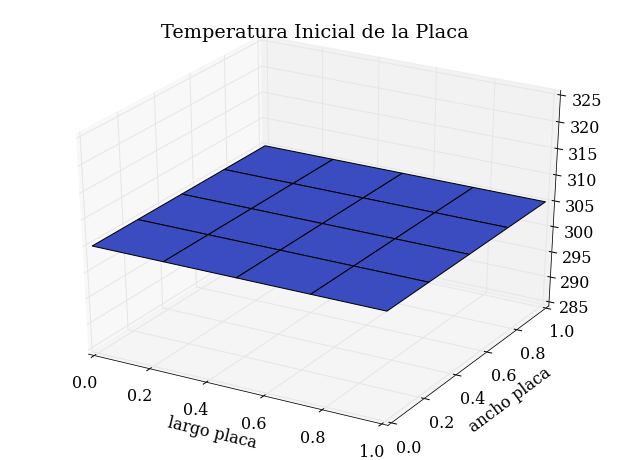

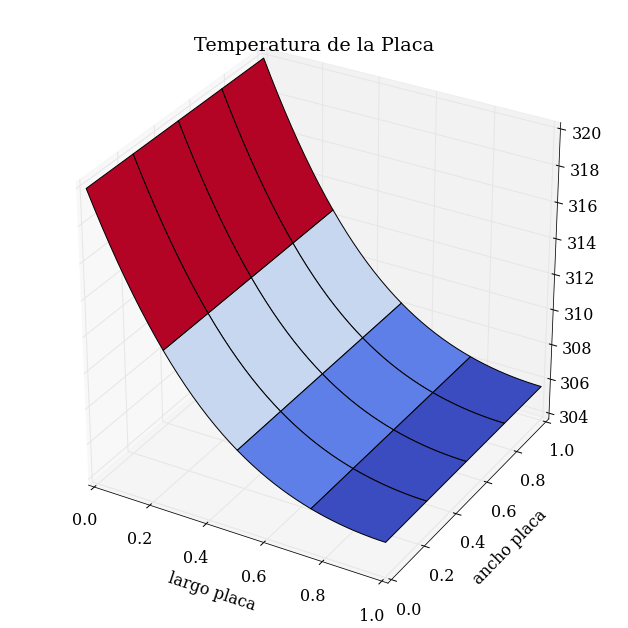

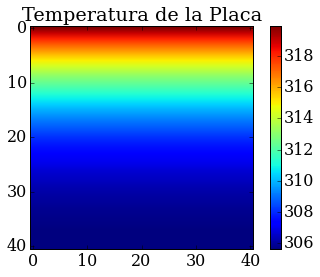

In [183]:
#PROGRAMA COMPLETO

#PROGRAMA PRINCIPAL

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

from math import pi

#definición dimensiones principales
lx = 1.
ly = 1.
lt = 1000.

dx = 0.025
dy = 0.025
dt = 0.025

nx = int((lx/dx)+1)
ny = int((ly/dx)+1)
nt = int(lt/dt)

x = np.linspace(0, lx, nx)
y = np.linspace(0, ly, ny)

#definición parámetros físicos

material = np.empty(6, dtype=object)

material[0] = np.array(["Cooper Alloy",8300., 385., 401., 401./(8300.*385.)])
material[1] = np.array(["Aluminum Alloy", 2770., 875., 150., 150./(2770.*875.)])
material[2] = np.array(["Structural Steel", 7850., 434., 60.5, 60.5/(7850.*434.)]) 
material[3] = np.array(["Stainless Steel", 7750., 480., 15.1, 15.1/(7750.*480.)]) 
material[4] = np.array(["Titanium Alloy", 4620., 522. ,21.9 , 21.9/(4620.*522.)])
material[5] = np.array(["Tungsteno", 19300., 132., 174., 174./(19300.*132.)])

#definimos arreglo para guardar resultados de todos los materiales
aprox = np.empty(len(material), dtype=object)

#for m in range(len(material)):
for m in range(1):    

    #seleciión de material    
    type_material = m
    
    # prop = np.zeros(5)
    # prop = material[type_material]

    name_material = material[m][0]
    rho = float(material[m][1])
    cp = float(material[m][2])
    k = float(material[m][3])
    alpha = float(material[m][4])

    print "Propiedades Físicas", name_material
    print "Densidad Másica =", rho , "[kg/m3]"
    print "Calor Específico =", cp , "[J/K·kg]"
    print "Conductividad Térmica =", k , "[W/K·m]"
    print "Difusividad Térmica =", round(alpha,6), "[m2/s]"
    print

    #T_inf = 300.
    T_inf = T_lab
    #h = 10.

    T = np.zeros((nx,ny))
    T_wall = np.zeros((nx,ny))
    T_in = np.zeros((nx,ny))
    T_aux = np.zeros((nx,ny))
    
    #definición temperaturas de nodos ficticios
    T_left = np.zeros((ny))
    T_right = np.zeros((ny))
    T_up = np.zeros((nx))
    T_down = np.zeros((nx))

    q_in = 15000.

    print "Flujo de Calor q_in =", q_in ,"[W/m2]"
    #print "Coeficiente de Convección h_conv =", h ,"[W/m2*K]"
    print "Temperatura Ambiente T_inf =", T_inf , "[K]"
    print

    #condición CFL
    CFL = alpha*dt/dx**2

    print "Condición de Estabilidad CFL =", round(CFL,6)
    print "Tamaño paso dx =", dx, "dy =", dy
    print
    #print "Vectores x,y de Malla 2D"
    #print x
    #print y
    #print
    print "N° de Pasos de Tiempo = ", nt
    print "Tamaño dt =", dt
    print

    tempo = 0

    #condición inicial
    for i in range(0,nx):
        for j in range(0,ny):
            T_in[i,j] = 305.
        
    T = T_in.copy()

    #print "Campo Inicial de Temperaturas"
    #print T
    #print

    #Cálculo Coeficiente de Convección Natural

    #T_wall = 360.
    T_wall = T
    #T_prom = 0.5*(T_wall + T_lab)

    g = 9.8
    D = 1.

    k_fluid = k_lab
    alpha_fluid = alpha_lab
    vis = vis_lab
    Pr = Pr_lab
    
    Betha = 1.
    Gr = 1.
    Ra = 1.
    Nu = 1.
    h_conv = 1.
    
    X_Gr = np.zeros((nx,ny))
    X_Pr = np.zeros((nx,ny))
    X_Ra = np.zeros((nx,ny))
    X_Nu_Morgan = np.zeros((nx,ny))
    X_Nu_Churchill = np.zeros((nx,ny))
    X_Nu_McAdams = np.zeros((nx,ny))
    X_h_Morgan = np.zeros((nx,ny))
    X_h_Churchill = np.zeros((nx,ny))
    X_h_McAdams = np.zeros((nx,ny))
    
    #Gr = np.zeros((nx,ny))
    #Ra = np.zeros((nx,ny))
    #Nu = np.zeros((nx,ny))

    #Cálculo Inicial de Coef. Convección Local en Bordes
    #Bordes Laterales
    for j in range(0,ny):
        if j == 0 or j == ny-1:
            for i in range(0,nx):
                Betha = Betha_gas_ideal(Betha, T_lab)
                Gr = Grashof(Gr, Betha, vis, T_wall[i,j], T_lab, g, D)
                Ra = Rayleigh(Ra, Gr, Pr)

                if Ra <= 10.**(4):    
                    print "El número de Ra =",Ra, "es menor al Límite Inferior del rango de operación para el criterio, Ra_min =", 10**(-10.)
                    print 
                else:
                    if Ra > 10.**4 and Ra < 10.**9:
                        #print "Convección Laminar: 10^4 < Ra < 10^9"
                        C = 0.59
                        m = 1./4.
                    elif Ra >= 10.**9:
                        #print "Convección Turbulenta: Ra > 10^9"
                        C = 0.1
                        m = 1./3.
                    Nu = Nu_McAdams_Placa(Nu, Ra)
                    h_conv = coef_CN(h_conv, k_fluid, D, Nu)
            
                X_Gr[i,j] = Gr
                X_Pr[i,j] = Pr    
                X_Ra[i,j] = Ra    
                X_Nu_McAdams[i,j] = Nu
                X_h_McAdams[i,j] = h_conv
    
    #Borde Frontal
    for i in range(0,nx):
        if i == nx-1:
            for j in range(1,ny-1):
                Betha = Betha_gas_ideal(Betha, T_lab)
                Gr = Grashof(Gr, Betha, vis, T_wall[i,j], T_lab, g, D)
                Ra = Rayleigh(Ra, Gr, Pr)

                if Ra <= 10**(4):    
                    print "El número de Ra =",Ra, "es menor al Límite Inferior del rango de operación para el criterio, Ra_min =", 10**(-10.)
                    print 
                else:
                    if Ra > 10.**4 and Ra < 10.**9:
                        #print "Convección Laminar: 10^4 < Ra < 10^9"
                        C = 0.59
                        m = 1./4.
                    elif Ra >= 10.**9:
                        #print "Convección Turbulenta: Ra > 10^9"
                        C = 0.1
                        m = 1./3.
                    Nu = Nu_McAdams_Placa(Nu, Ra)
                    h_conv = coef_CN(h_conv, k_fluid, D, Nu)
            
                X_Gr[i,j] = Gr
                X_Pr[i,j] = Pr    
                X_Ra[i,j] = Ra    
                X_Nu_McAdams[i,j] = Nu
                X_h_McAdams[i,j] = h_conv
                
    #ALGORITMO DE COMPUTO TEMPORAL
    print "ALGORITMO TEMPORAL" 
    print
    #for t in range(0,nt):
    #print t
    for t in range(nt):       
        #X_h_aux = 0.1*X_h_Morgan.copy()   
        X_h_aux = X_h_McAdams.copy()
        T_aux = T.copy()
    
        #temp. fict. borde izquierdo
        T_left = temp_left(T_left, T, dt, dx, dy, nx, ny, alpha, k, q_in, X_h_aux, T_inf, T_aux)
        #print T_left

        #temp. fict. borde derecho        
        T_right = temp_right(T_right, T, dt, dx, dy, nx, ny, alpha, k, q_in, X_h_aux, T_inf, T_aux)
    
        #temp. fict. borde inferior 
        T_down = temp_down(T_down, T, dt, dx, dy, nx, ny, alpha, k, q_in, X_h_aux, T_inf, T_aux)  

        #temp. fict. borde superior
        T_up = temp_up(T_up, T, dt, dx, dy, nx, ny, alpha, k, q_in, X_h_aux, T_inf, T_aux)

        #temperatura dominio
        T = euler_explicito(T, dt, dx, dy, nx, ny, alpha, k, X_h_aux, T_aux, T_down, T_up, T_left, T_right)
        
        T_wall = T
      
        #Cálculo Temporal de Coef. Convección Local en Bordes
        #Bordes Laterales
        for j in range(0,ny):
            if j == 0 or j == ny-1:
                for i in range(0,nx):
                    Betha = Betha_gas_ideal(Betha, T_lab)
                    Gr = Grashof(Gr, Betha, vis, T_wall[i,j], T_lab, g, D)
                    Ra = Rayleigh(Ra, Gr, Pr)

                    if Ra <= 10**(4):    
                        print "El número de Ra =",Ra, "es menor al Límite Inferior del rango de operación para el criterio, Ra_min =", 10**(-10.)
                        print 
                    else:
                        if Ra > 10.**4 and Ra < 10.**9:
                            #print "Convección Laminar: 10^4 < Ra < 10^9"
                            C = 0.59
                            m = 1./4.
                        elif Ra >= 10.**9:
                            #print "Convección Turbulenta: Ra > 10^9"
                            C = 0.1
                            m = 1./3.
                        Nu = Nu_McAdams_Placa(Nu, Ra)
                        h_conv = coef_CN(h_conv, k_fluid, D, Nu)
            
                    X_Gr[i,j] = Gr
                    X_Pr[i,j] = Pr    
                    X_Ra[i,j] = Ra    
                    X_Nu_McAdams[i,j] = Nu
                    X_h_McAdams[i,j] = h_conv
    
        #Borde Frontal
        for i in range(0,nx):
            if i == nx-1:
                for j in range(1,ny-1):
                    Betha = Betha_gas_ideal(Betha, T_lab)
                    Gr = Grashof(Gr, Betha, vis, T_wall[i,j], T_lab, g, D)
                    Ra = Rayleigh(Ra, Gr, Pr)

                    if Ra <= 10**(4):    
                        print "El número de Ra =",Ra, "es menor al Límite Inferior del rango de operación para el criterio, Ra_min =", 10**(-10.)
                        print 
                    else:
                        if Ra > 10.**4 and Ra < 10.**9:
                            #print "Convección Laminar: 10^4 < Ra < 10^9"
                            C = 0.59
                            m = 1./4.
                        elif Ra >= 10.**9:
                            #print "Convección Turbulenta: Ra > 10^9"
                            C = 0.1
                            m = 1./3.
                        Nu = Nu_McAdams_Placa(Nu, Ra)
                        h_conv = coef_CN(h_conv, k_fluid, D, Nu)
            
                    X_Gr[i,j] = Gr
                    X_Pr[i,j] = Pr    
                    X_Ra[i,j] = Ra    
                    X_Nu_McAdams[i,j] = Nu
                    X_h_McAdams[i,j] = h_conv
    
        tempo = tempo + dt        
    #Fin algoritmo temporal    
    
    #VALORES PROMEDIO
    h_prom = 0.
    for i in range(nx):
        for j in range(ny):
            h_prom = h_prom + X_h_McAdams[i,j]
    
    #print h_prom
    h_prom = h_prom/(2*(nx-1) + (ny-1))
    print "Coef. de Convección Promedio h_prom =", h_prom
    print
    
    Ra_prom = 0.
    for i in range(nx):
        for j in range(ny):
            Ra_prom = Ra_prom + X_Ra[i,j]
    
    #print h_prom
    Ra_prom = Ra_prom/(2*(nx-1) + (ny-1))
    print "Número de Rayleigh Promedio Ra_prom =", Ra_prom
    
    if Ra > 10**4 and Ra < 10**9:
        print "Convección en régimen Laminar: 10^4 < Ra < 10^9"
    elif Ra >= 10**9:
        print "Convección en régimen Turbulenta: Ra > 10^9"
    
    aprox[m] = np.zeros(len(T))
    aprox[m] = T
    
    print "Evaluación en un rango de tiempo", int(tempo) ,"[s]"
    print
    #print "Campo de Temperaturas Resultante"
    #print aprox[m]
    #print T  
    
    #gráfica solución
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(11,8), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)

    #print np.shape(X),np.shape(Y),np.shape(T_in)

    ax.plot_surface(X,Y,np.transpose(T_in), cmap='coolwarm')

    plt.title(u'Temperatura Inicial de la Placa')
    plt.xlabel('largo placa')
    plt.ylabel('ancho placa')
    # Mostramos en pantalla
    plt.show()

    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(11,11), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)

    ax.plot_surface(X,Y,np.transpose(T),cmap='coolwarm');

    plt.title(u'Temperatura de la Placa')
    plt.xlabel('largo placa')
    plt.ylabel('ancho placa')
    # Mostramos en pantalla
    #plt.show()

    # Creamos una figura
    plt.figure()

    plt.imshow(T);
    plt.title(u'Temperatura de la Placa')
    #plt.xlabel('largo placa')
    #plt.ylabel('ancho placa')

    # Añadimos una colorbar
    plt.colorbar();

    # Mostramos en pantalla
    plt.show()

#############################



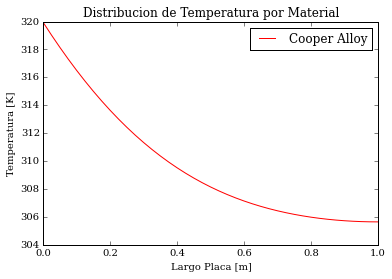

In [184]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

color = np.array(['r','c','g','b','r','c'])
tipo_linea = np.array(['-','-','-','-','-','-'])

#for m in range(len(material)):
for m in range(1):    
    pyplot.plot(x, aprox[m][:,2], c=color[m],ls=tipo_linea[m],label=material[m][0])
    
pyplot.legend(loc='best',prop={'size':12})
plt.title(u"Distribucion de Temperatura por Material")
plt.xlabel("Largo Placa [m]")
plt.ylabel(u"Temperatura [K]")


Propiedades Físicas Cooper Alloy
Densidad Másica = 8300.0 [kg/m3]
Calor Específico = 385.0 [J/K·kg]
Conductividad Térmica = 401.0 [W/K·m]
Difusividad Térmica = 0.000125 [m2/s]

Flujo de Calor q_in = 15000.0 [W/m2]
Coeficiente de Convección h_conv = 40.0 [W/m2*K]
Temperatura Ambiente T_inf = 300.0 [K]

Condición de Estabilidad CFL = 0.00502
Tamaño paso dx = 0.025 dy = 0.025

N° de Pasos de Tiempo =  40000
Tamaño dt = 0.025

Evaluación en un rango de tiempo 999 [s]

Campo de Temperaturas Resultante


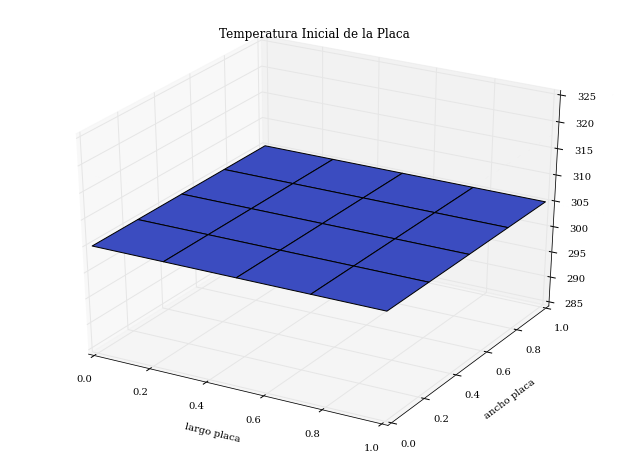

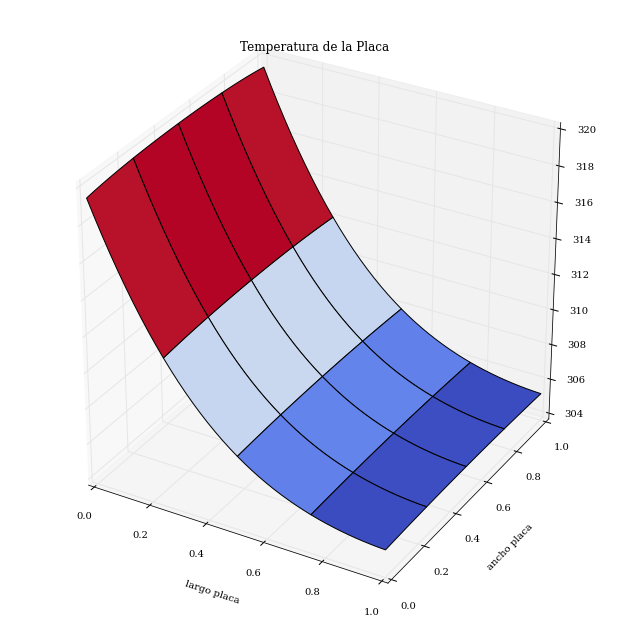

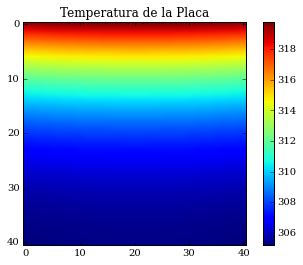

In [185]:
#for m in range(len(material)):
#definimos arreglo para guardar resultados de todos los materiales
aprox_II = np.empty(len(material), dtype=object)
for m in range(1):

    #seleciión de material    
    type_material = m
    
    # prop = np.zeros(5)
    # prop = material[type_material]

    name_material = material[m][0]
    rho = float(material[m][1])
    cp = float(material[m][2])
    k = float(material[m][3])
    alpha = float(material[m][4])

    print "Propiedades Físicas", name_material
    print "Densidad Másica =", rho , "[kg/m3]"
    print "Calor Específico =", cp , "[J/K·kg]"
    print "Conductividad Térmica =", k , "[W/K·m]"
    print "Difusividad Térmica =", round(alpha,6), "[m2/s]"
    print

    T_inf = 300.
    h = 40.
    for i in range(nx):
        for j in range(ny):
            X_h_Morgan[i,j] = h

    T = np.zeros((nx,ny))
    T_in = np.zeros((nx,ny))
    T_aux = np.zeros((nx,ny))

    q_in = 15000.

    print "Flujo de Calor q_in =", q_in ,"[W/m2]"
    print "Coeficiente de Convección h_conv =", h ,"[W/m2*K]"
    print "Temperatura Ambiente T_inf =", T_inf , "[K]"
    print

    #condición CFL
    CFL = alpha*dt/dx**2

    print "Condición de Estabilidad CFL =", round(CFL,6)
    print "Tamaño paso dx =", dx, "dy =", dy
    print
    #print "Vectores x,y de Malla 2D"
    #print x
    #print y
    #print
    print "N° de Pasos de Tiempo = ", nt
    print "Tamaño dt =", dt
    print

    tempo = 0

    #condición inicial
    for i in range(0,nx):
        for j in range(0,ny):
            T_in[i,j] = 305
        
    T = T_in.copy()

    #print "Campo Inicial de Temperaturas"
    #print T

    #definición temperaturas de nodos ficticios
    T_left = np.zeros((ny))
    T_right = np.zeros((ny))
    T_up = np.zeros((nx))
    T_down = np.zeros((nx))

    #ALGORITMO TEMPORAL

    for t in range(0,nt):
    
        T_aux = T.copy()
    
        #temp. fict. borde izquierdo
        T_left = temp_left(T_left, T, dt, dx, dy, nx, ny, alpha, k, q_in, X_h_Morgan, T_inf, T_aux)

        #temp. fict. borde derecho        
        T_right = temp_right(T_right, T, dt, dx, dy, nx, ny, alpha, k, q_in, X_h_Morgan, T_inf, T_aux)
    
        #temp. fict. borde inferior 
        T_down = temp_down(T_down, T, dt, dx, dy, nx, ny, alpha, k, q_in, X_h_Morgan, T_inf, T_aux)  

        #temp. fict. borde superior
        T_up = temp_up(T_up, T, dt, dx, dy, nx, ny, alpha, k, q_in, X_h_Morgan, T_inf, T_aux)

        #temperatura dominio
        T = euler_explicito(T, dt, dx, dy, nx, ny, alpha, k, X_h_Morgan, T_aux, T_down, T_up, T_left, T_right)
     
        tempo = tempo + dt 
        
    aprox_II[m] = np.zeros(len(T))
    aprox_II[m] = T
    
    print "Evaluación en un rango de tiempo", int(tempo) ,"[s]"
    print
    print "Campo de Temperaturas Resultante"
    #print aprox[m]
    #print T   

    #gráfica solución
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(11,8), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)

    #print np.shape(X),np.shape(Y),np.shape(T_in)

    ax.plot_surface(X,Y,np.transpose(T_in), cmap='coolwarm')

    plt.title(u'Temperatura Inicial de la Placa')
    plt.xlabel('largo placa')
    plt.ylabel('ancho placa')
    # Mostramos en pantalla
    plt.show()

    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(11,11), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)

    ax.plot_surface(X,Y,np.transpose(T),cmap='coolwarm');

    plt.title(u'Temperatura de la Placa')
    plt.xlabel('largo placa')
    plt.ylabel('ancho placa')
    # Mostramos en pantalla
    #plt.show()

    # Creamos una figura
    plt.figure()

    plt.imshow(T);
    plt.title(u'Temperatura de la Placa')
    #plt.xlabel('largo placa')
    #plt.ylabel('ancho placa')

    # Añadimos una colorbar
    plt.colorbar();

    # Mostramos en pantalla
    plt.show()

#############################


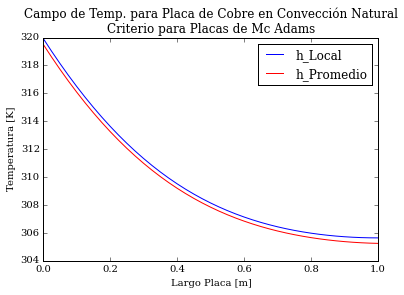

In [186]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

color = np.array(['r','c','g','b','m','k'])
tipo_linea = np.array(['-','-','-','-','-','-'])

for w in range(2):
    if w == 0:
        #for m in range(len(material)):
        for m in range(1):
            pyplot.plot(x, aprox[m][:,2], c=color[m+3],ls=tipo_linea[m],label="h_Local")#material[m][0])
    else:        
        #for m in range(len(material)):
        for m in range(1):
            pyplot.plot(x, aprox_II[m][:,2], c=color[m],ls=tipo_linea[m],label="h_Promedio")#material[m][0])
pyplot.legend(loc='best',prop={'size':12})
#plt.title(u"Campo de T°K para Placa de Cobre")
plt.title(u"Campo de Temp. para Placa de Cobre en Convección Natural \nCriterio para Placas de Mc Adams")
plt.xlabel("Largo Placa [m]")
plt.ylabel(u"Temperatura [K]")

In [187]:
C = 0.59
m = 1./4.

Nu_prom = C*(Ra_prom**n)

print "Ra_prom =", Ra_prom
print "Nu_prom =", Nu_prom

h_prom = (25.6469)*Nu_prom*10.**(-3)/D

print h_prom
print "k", k 

h_prom = (k)*Nu_prom*10.**(-3)/D

print h_prom

Ra_prom = 817641956.152
Nu_prom = 547.943206423
14.0530446208
k 401.0
219.725225776
